### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import classification_report

import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz
from graphviz import Digraph

In [2]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

dataset = digits

In [3]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=4)

# 建立模型
clf = GradientBoostingClassifier()
print(clf)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)
#print(y_pred)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [4]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9666666666666667


In [5]:
print(classification_report(y_test, y_pred))

print(f"score:{clf.score(x_test, y_test):.3f}")
#for estimators_n in clf.estimators_ :
#    for tree in estimators_n :
#        print(f"score:{tree.score(x_test, y_test):.3f}")


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.95      0.95      0.95        39
           2       1.00      0.98      0.99        48
           3       0.98      0.93      0.95        43
           4       1.00      0.95      0.98        42
           5       0.96      0.96      0.96        49
           6       1.00      0.97      0.99        39
           7       0.98      1.00      0.99        49
           8       0.89      0.98      0.93        43
           9       0.96      0.96      0.96        50

   micro avg       0.97      0.97      0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

score:0.967


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

In [8]:
'''
ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[47  0  0  0  0  0  0  0  1  0]
 [ 1 37  0  1  0  0  0  0  0  0]
 [ 1  0 47  0  0  0  0  0  0  0]
 [ 0  1  0 40  0  0  0  0  2  0]
 [ 0  0  0  0 40  2  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  2]
 [ 0  0  0  0  0  0 38  0  1  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0  1  1 48]]
Normalized confusion matrix
[[0.97916667 0.         0.         0.         0.         0.
  0.         0.         0.02083333 0.        ]
 [0.02564103 0.94871795 0.         0.02564103 0.         0.
  0.         0.         0.         0.        ]
 [0.02083333 0.         0.97916667 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.02325581 0.         0.93023256 0.         0.
  0.         0.         0.04651163 0.        ]
 [0.         0.         0.         0.         0.95238095 0.04761905
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0

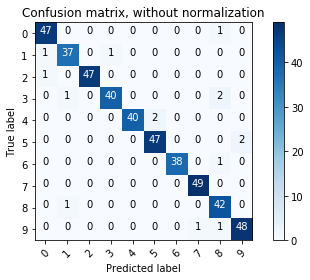

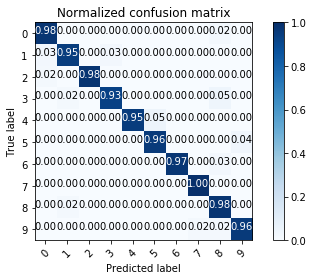

In [9]:
class_names = dataset.target_names

cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

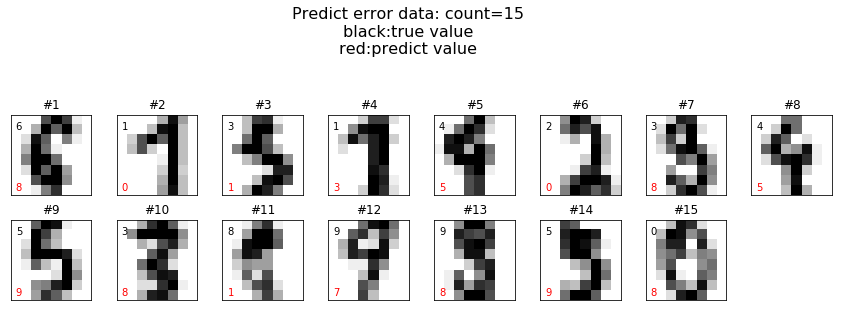

In [12]:
'''
ref: http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html
'''

# print error image
y_pred_err_inx = [i for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
x_test_err = x_test[y_pred_err_inx]
y_test_err = y_test[y_pred_err_inx]
y_pred_err = y_pred[y_pred_err_inx]

# Plot the prediction
fig = plt.figure(figsize=(15, 15))  # figure size in inches
fig.suptitle(f"Predict error data: count={len(x_test_err)}\nblack:true value\nred:predict value", horizontalalignment='center', verticalalignment='top', fontsize=16) 
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.3, wspace=0.1)
fig.subplots_adjust(hspace=0.3, wspace=0.1)

# plot the digits: each image is 8x8 pixels
for i in range(len(y_pred_err)):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.set_title(f'#{i+1}')
    ax.imshow(x_test_err.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    ax.text(0, 1, str(y_test_err[i]), color='black')
    ax.text(0, 7, str(y_pred_err[i]), color='red')
  
plt.show()

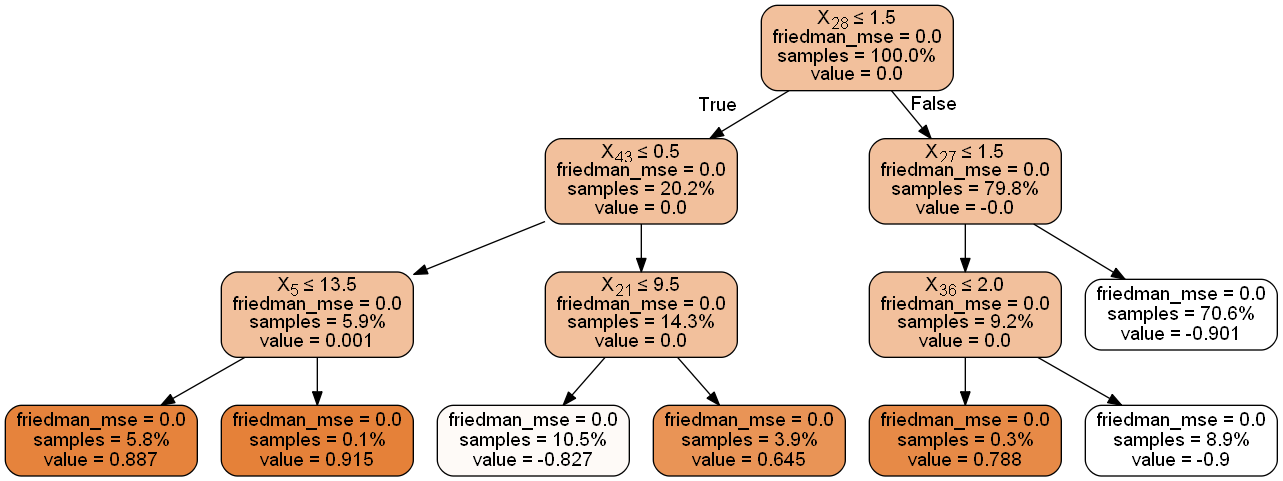

In [11]:
# Get the sample decision tree
idx_sample = 60

n = clf.n_estimators_
tree = clf.estimators_[idx_sample, 0]
#for i in range(n):
#    print(clf.train_score_[i])

dot_data = export_graphviz(
    tree,
    out_file=None, filled=True,
    rounded=True,  
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())